##### <img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Predictive analytics</center>
# Challenge S4: Modelos regresivos - Predicción bursátil

## Objetivo

El objetivo de este challenge es utilizar las técnicas de regresión aprendidas, para ello, vamos a realizar una predicción bursátil.

## 1. Configuración del entorno

Cargamos los paquetes que vamos a utilizar en la sesión.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

## 2. Análisis de los datos de partida

En este caso vamos a utilizar un dataset obtenido de Yahoo finance, en el que se incluye la cotización del índice del IBEX desde su origen:
https://es.finance.yahoo.com/quote/%5EIBEX/history?p=%5EIBEX



**Carga el fichero IBEX.csv y analiza sus datos.**
 - **¿Qué variables tenemos?**
 - **¿Hay valores nulos? ¿A qué se deben esos valores? **

In [2]:
## Lectura del dataframe
ibex = pd.read_csv('IBEX.csv')

In [3]:
ibex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6587 entries, 0 to 6586
Data columns (total 7 columns):
Date         6587 non-null object
Open         6450 non-null float64
High         6450 non-null float64
Low          6450 non-null float64
Close        6450 non-null float64
Adj Close    6450 non-null float64
Volume       6450 non-null float64
dtypes: float64(6), object(1)
memory usage: 360.3+ KB


In [4]:
## Vamos a ver qué días tienen valores nulos y a qué se corresponden
boolean = pd.isnull(ibex['Open'])
ibex[boolean]

,Date,Open,High,Low,Close,Adj Close,Volume
70,1993-10-12,NaN,NaN,NaN,NaN,NaN,NaN
84,1993-11-01,NaN,NaN,NaN,NaN,NaN,NaN
109,1993-12-06,NaN,NaN,NaN,NaN,NaN,NaN
111,1993-12-08,NaN,NaN,NaN,NaN,NaN,NaN
123,1993-12-24,NaN,NaN,NaN,NaN,NaN,NaN
132,1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN
193,1994-04-01,NaN,NaN,NaN,NaN,NaN,NaN
194,1994-04-04,NaN,NaN,NaN,NaN,NaN,NaN
214,1994-05-02,NaN,NaN,NaN,NaN,NaN,NaN
331,1994-10-12,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Transformación del dataset

Vamos a adaptar nuestros datos de entrada a un dataset con el que poder trabajar. Para ello vamos a crear nuestro atributo X y nuestra variable y.

- **ibex_X**: variable de tipo índice para la fecha --> Vamos a crear una variable OffsetDays resultado de la diferencia entre la fecha y el primer día de nuestro dataframe. Previamente debemos eliminar los valores nulos de esta variable y convertirla al tipo fecha si queremos hacer la resta de dos fechas.
   
   Notas: 
   
   Para pasar un timedelta a entero en días se puede usar serie.dt.days, donde serie es la serie que queremos convertir.
   
   `sklearn` espera que los atributos vengan en un array 2d aunque tengan sólo una columna, por eso es preciso transformarlos a una matriz 2D.
   
   
- **ibex_y**: valor de cierre de la acción

** Crea el dataset con las indicaciones anteriores**

In [5]:
## Eliminamos los valores null que se corresponden con días de cierre de la bolsa
ibex.drop(ibex[boolean].index, inplace = True)
ibex.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6450 entries, 0 to 6586
Data columns (total 7 columns):
Date         6450 non-null object
Open         6450 non-null float64
High         6450 non-null float64
Low          6450 non-null float64
Close        6450 non-null float64
Adj Close    6450 non-null float64
Volume       6450 non-null float64
dtypes: float64(6), object(1)
memory usage: 403.1+ KB


In [6]:
from datetime import date
## Convertir campo fecha para facilitar las operaciones
ibex['Date'] = pd.to_datetime(ibex['Date'], format = '%Y-%m-%d').dt.date
## Calcular índice como la diferencia entre esta fecha y el primer día del dataframe
ibex['OffsetDays'] = ibex['Date'] - ibex['Date'].iloc[0]
ibex['OffsetDays'] = ibex['OffsetDays'].dt.days

In [7]:
## Tomamos como atributo X la variable OffsetDays que hemos creado
ibex_X = ibex['OffsetDays']

In [8]:
len(ibex_X)

6450

In [9]:
## Los transformamos a una matriz 2D.
ibex_X = np.array([ibex_X])
ibex_X = np.transpose(ibex_X)

In [10]:
## Como variable y utilizaremos el valor de cierre de la acción
ibex_y = ibex.Close.values

**¿Por qué no utilizamos el índice del propio dataframe en vez del campo que hemos calculado (OffsetDays)?**

Para tener una medida más precisa cuando queramos comparar entre valores.

## 4. Preprocesamiento de los datos

En este caso para hacer un poco más completo el análisis vamos a realizar un paso previo que resulta recomendable siempre que hagamos una regresión y es la normalización.

Normalizar una variable consiste en transformar dicha variable de manera que su media sea 0 ($\mu = 0$) y su desviación tipica 1 ($\delta = 1$)

$$X_{norm} = \frac{X_i - \mu}{\delta}$$

La normalización es necesaria en muchos algoritmos porque:

* Nos permite trabajar con un rango de datos controlado de manera que no perdamos precisión en las operaciones
* La variables están centradas, luego eliminamos sesgos en los datos 
* Algunos modelos realizan asunciones sobre la distribución de la entrada de los datos

Con `sklearn` normalizar es muy sencillo:

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(ibex_X)
ibex_X_scaled = scaler.transform(ibex_X)

/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [12]:
print(ibex_X_scaled)

[[-1.74187662]
 [-1.74150489]
 [-1.74113317]
 ...
 [ 1.7218299 ]
 [ 1.72220163]
 [ 1.72257335]]


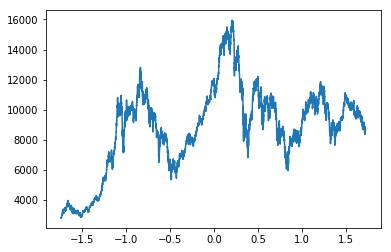

In [13]:
## Vemos los resultados
plt.plot(ibex_X_scaled, ibex_y)

## 5. Evaluación

Una vez que tenemos los datos adaptados al formato adecuado podemos empezar a entrenar modelos. Como siempre, antes de empezar con el conjunto de test, suele ser conveniente entrenar el modelo y evaluarlo con el propio conjunto de entrenamiento, para ello vamos a crear una función similar a la que usamos en el worksheet para entrenar, predecir y representar los resultados.

**Completa la función evalua_modelo**

In [14]:
def evalua_modelo(modelo, X_train, X_test, y_train, y_test):
    
    ## Entrenamiento del modelo
    modelo.fit(X_train, y_train)
    
    ## Predicción sobre el conjunto de entrenamiento
    y_pred_train = modelo.predict(X_train)
    
    ## Evaluación sobre el conjunto de entrenamiento
    score_train = modelo.score(X_train, y_train)
    
    ## Predicción sobre el conjunto de test
    y_pred_test = modelo.predict(X_test)
    ## Evaluación sobre el conjunto de entrenamiento
    score_test = modelo.score(X_test, y_test)
    
    ## Representación de los resultados
    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(20,6))
    
    ax1.plot(X_train, y_train, 'o', label='Train')
    ax1.plot(X_train, y_pred_train, '*', label='Prediction')
    ax1.set_title('Conjunto de entrenamiento (Score %.2f)' % score_train)
    ax1.legend()
   
    ## Representa resultados
    ax2.plot(X_test, y_test, 'o',color='green',label='Test')
    ax2.plot(X_test, y_pred_test, '*',color='darkorange',label='Prediction')
    ax2.legend()
    ax2.set_title('Conjunto de test (Score %.2f)' % score_test)
    
    f.show()
    
    return modelo

**Separa el dataset en conjunto de entrenamiento y test, para empezar puedes utilizar un conjunto de test del 10%**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ibex_X_scaled, ibex_y, test_size=0.1, random_state=42, shuffle=False)

**Utiliza al menos dos modelos de los vistos en la sesión anterior para entrenar y comparar los resultados utilizando la función que hemos definido antes evalua_modelo.**
- **¿Qué score has conseguido?**
- **¿Qué modelos has elegido? ¿Por qué?**


In [16]:
## Importar los modelos que vamos a utilizar de las correspondientes librerías

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


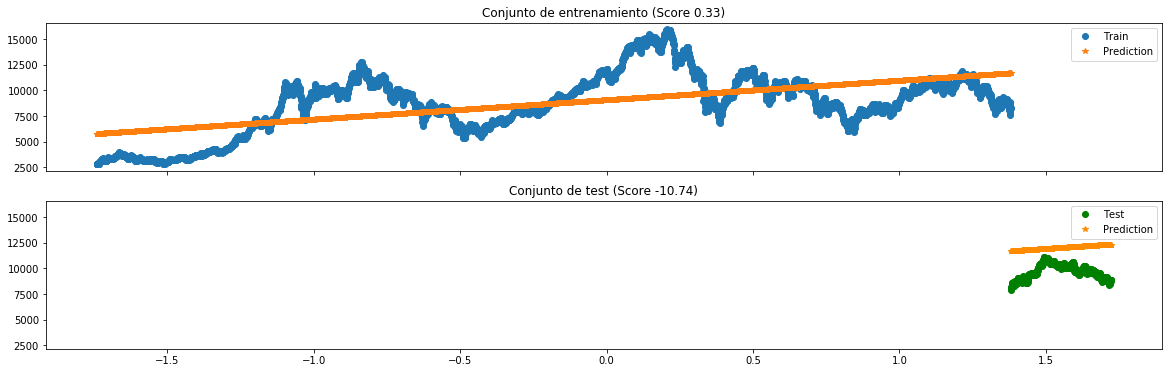

In [17]:
modelo1 = evalua_modelo(LinearRegression(), X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


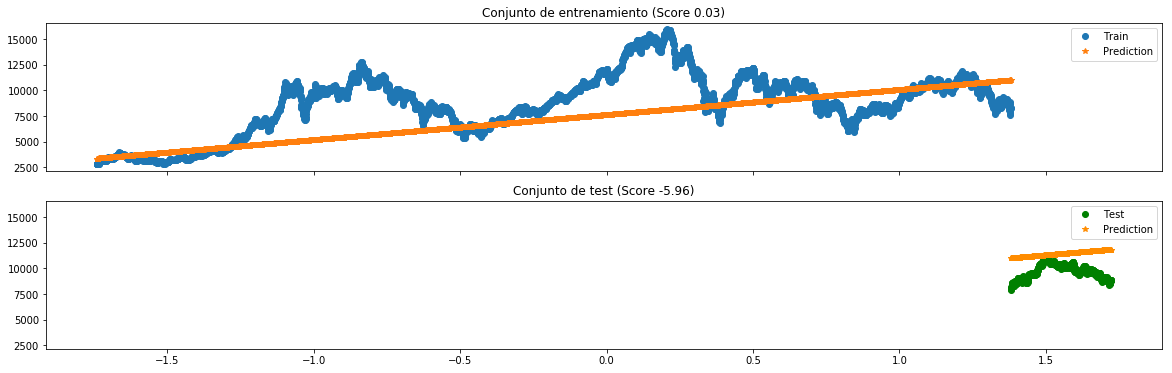

In [18]:
from sklearn.linear_model import RANSACRegressor
modelo2 = evalua_modelo(RANSACRegressor(), X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


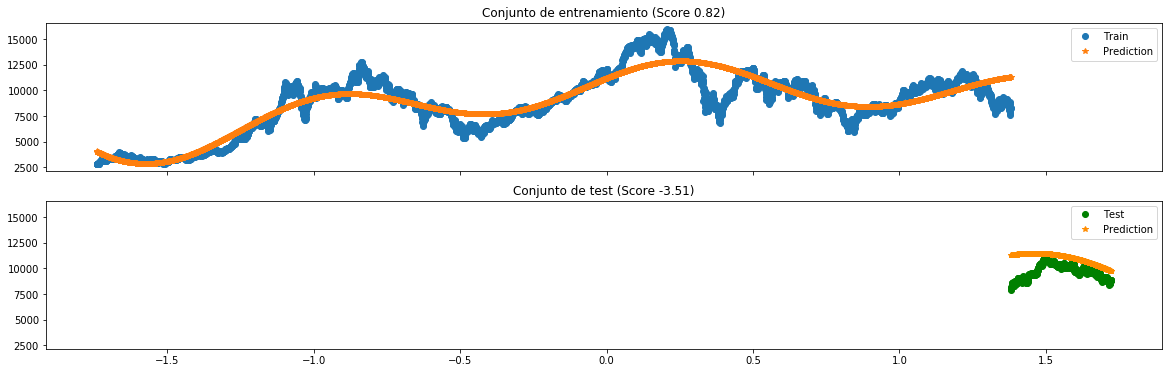

In [19]:
modelo3 = evalua_modelo(SVR(C=2000), X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


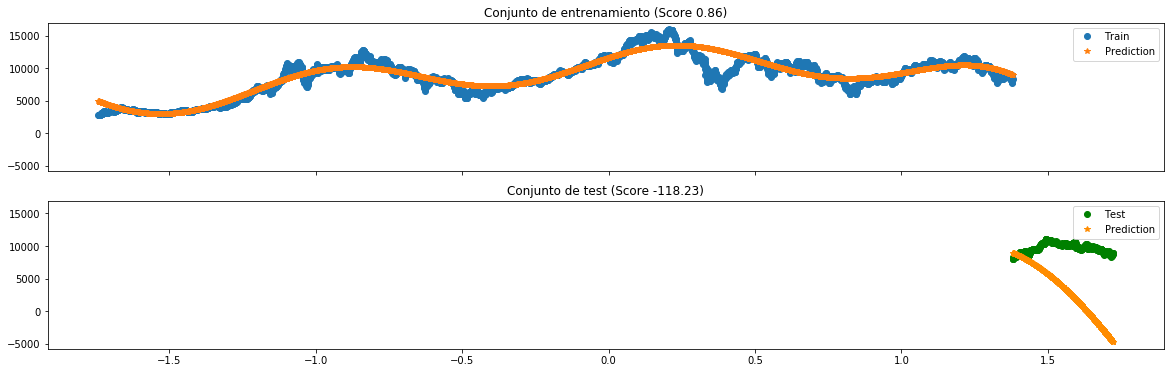

In [20]:
modelo4 = evalua_modelo(SVR(C=10000), X_train, X_test, y_train, y_test)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


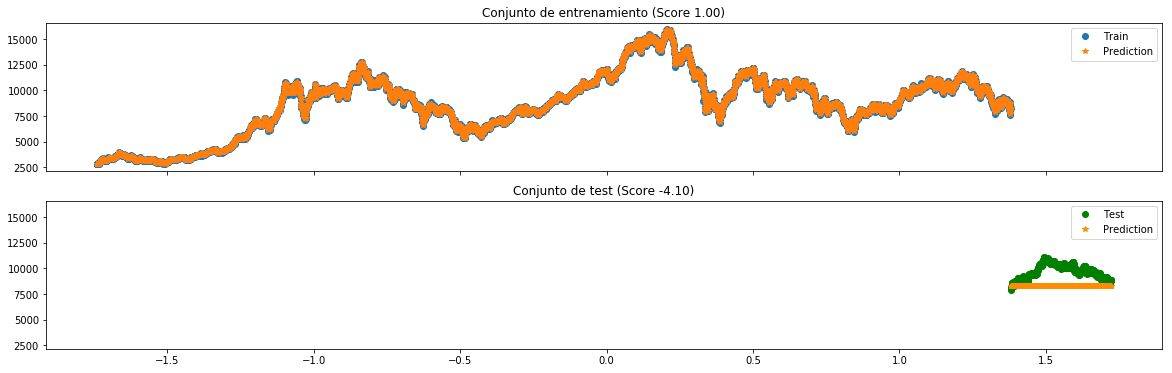

In [21]:
from sklearn.ensemble import RandomForestRegressor

modelo5 = evalua_modelo(RandomForestRegressor(n_estimators=10, random_state=0), X_train, X_test, y_train, y_test)

## 6. Predicción

Para el modelo anterior que mejor consideres, **realiza una predicción a futuro, por ejemplo, ¿qué ocurrirá dentro de 30 días?**

**Según tus resultados, ¿deberíamos comprar o vender acciones a día de hoy?**
- Compramos si el valor predicho es mayor al valor actual, es decir, las acciones van a subir.
- Vendemos si el valor predicho es menor al valor actual, es decir, las acciones vana a bajar.


En este caso se usará la predicción que más se ajusrta a la realidad; el modelo 3, según el cual se debería realizar un proceso de compra.

In [22]:
## Vamos a hacer una predicción para dentro de un mes
dias = 30
pos_actual = int(ibex_X[-1][0])
x_pred = scaler.transform([[pos_actual+dias]])

In [23]:
## Hacemos la predicción
y_pred = modelo3.predict(x_pred)
print('Valor predicho: {}'.format(y_pred[0]))
print('Valor actual: {}'.format(ibex_y[-1]))

Valor predicho: 9586.469552133036
Valor actual: 8877.099609


**¿Qué puedes decir de la predicción? ¿Tenemos la misma situación en 1993 que en 2019?**

La predicción muestra una diferencia bastante alta entre el valor actual y el predicho. Esto se debe a que los cambios bursátiles suelen ser procesos estocásticos muy cambiantes por factores externos o ajenos a la propiedad del valor en el tiempo.

Se observa en el modelo una tendencia positiva en los niveles de 1993, y en ese sentido se puede relacionar la predicción con ese análisis. No obstante, también los factores de otras funciones y eventos distintos en el tiempo, es algo influyente que no se considera en este estudio

## 7. Predicción mejorada

Vamos a hacer una predicción mejorada, para ello, vamos a usar un procesamiento de la información en ventanas: Por cada elemento de la serie, entrena un regresor con un conjunto de datos de tamaño "long_ventana_entrenamiento" y realiza una predicción a "prediccion_a_n_dias".

**Completa la función procesa_en_ventanas**

In [24]:
def procesa_en_ventanas(regressor, X, y, long_ventana_entrenamiento, prediccion_a_n_dias):
    '''
    Por cada elemento de la serie, entrena un regresor con un conjunto de datos de tamaño
    "long_ventana_entrenamiento" y realiza una predicción a "prediccion_a_n_dias"
    
    Obtiene como entrada:
    * Modelo de regresión
    * Vectores X e y
    * Tamaño de la ventana de entrenamiento
    * N de días a realizar la predicción
    
    Devuelve 4 listas con un punto cada predicción:
    * pos_actual: posición actual de la serie
    * valor_actual: valor actual de la serie
    * pos_pred: posición predicha de la serie (pos_actual + prediccion_a_n_dias)
    * valor_pred: valor predicho de la serie
    
    Por ejemplo: procesa_en_ventanas(SVR(C=5), ibex_X, ibex_y, 60, 30) por cada punto de la 
    serie entrena un modelo con los 60 últimos días y realiza una predicción a 30 días.
    '''
   
 ## Inicialización de variables
    pos_actual = []
    valor_actual = []
    pos_pred = []
    valor_pred = []
    
    inicio_serie = long_ventana_entrenamiento
    fin_serie = X.shape[0] - (prediccion_a_n_dias + 1)
    
    for i in range(inicio_serie, fin_serie):
        
        ## Ventana de entrenamiento
        ini_train = i - long_ventana_entrenamiento
        fin_train = i
        ventana_X_train = X[ini_train : fin_train]
        ventana_y_train = y[ini_train : fin_train]
        
        ## Predicción a n días
        pos_test = i + prediccion_a_n_dias
        ventana_X_test = X[pos_test : pos_test + 1]
        ventana_y_test = y[pos_test : pos_test + 1]

        ## Entrenamos nuestro modelo
        regressor.fit(ventana_X_train, ventana_y_train)
        ## Hacemos la predicción
        y_pred = regressor.predict(ventana_X_test)
        
        ## Actualizamos las variables
        pos_actual.append(ventana_X_train[-1][0])
        valor_actual.append(ventana_y_train[-1])
        pos_pred.append(ventana_X_test[0][0])
        valor_pred.append(y_pred[0])
        
        if i % 75 == 0:
            print(".", end='')
    print("")
    
    ## Representamos los resultados
    plt.figure(figsize=(20, 8))
    plt.plot(X, y, color="#FF3333")
    
    lines = []
    lines.append(plt.scatter(pos_pred, valor_pred, s=1, label="Predicción a " + str(prediccion_a_n_dias) + " dias"))
    plt.legend(handles=lines)
    
    plt.grid(color='lightgrey', linestyle="dashed", linewidth=1)
    
    return pos_actual, valor_actual, pos_pred, valor_pred

** Utiliza la función anterior para realizar la predicción, elige modelo a utilizar y el tamaño de la ventana de entrenamiento y los días a los que quieres hacer la predicción**

.....................................................................................


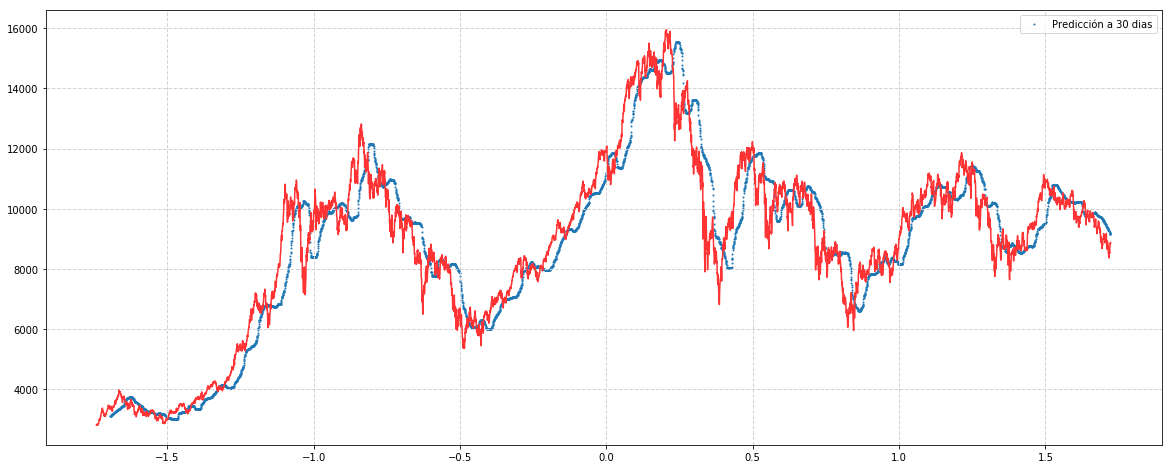

In [25]:
modelo_elegido = SVR(C=5)
long_ventana_entrenamiento = 60
prediccion_a_n_dias = 30

pos_actual, valor_actual, pos_pred, valor_pred = procesa_en_ventanas(modelo_elegido, ibex_X_scaled, ibex_y, long_ventana_entrenamiento, prediccion_a_n_dias)

In [26]:
from sklearn.ensemble import RandomForestRegressor
calculoEvaluacionModelo(RandomForestRegressor(n_estimators=20, random_state=0),df_datos,False)


pos_actual, valor_actual, pos_pred, valor_pred = procesa_en_ventanas(modelo_elegido, ibex_X_scaled, ibex_y, long_ventana_entrenamiento, prediccion_a_n_dias)

NameError: name 'calculoEvaluacionModelo' is not defined

### 7.1.- Compra y venta de acciones

Una vez que tenemos nuestra predicción, vamos a ver cómo nos iría en la compra y venta de acciones. Para ello creamos un algoritmo con el siguiente diagrama de flujo:

<img src="Diagrama1.jpg">

**Completa el siguiente bloque en función del diagrama de flujo anterior**

In [ ]:
capital = 1000.0
acciones = 0.0

valor_compra = 0.0

print("[%04d] Capital=%.2f, Acciones=%.2f" % (0, capital, acciones))

for i in range(len(pos_actual)):
    if capital == 0.0 and acciones == 0.0:
        print("[End] nos hemos quedado sin capital ;-(")
        break
    
    dif = valor_pred[i] - valor_actual[i]
    
    if dif > 0.0:
        # Esperamos que el valor de la suba, compramos
        if capital > 0.0:
            print("[%04d] Compramos a %.2f (acciones=%.2f)" % (i, valor_actual[i], acciones))
            acciones_a_comprar = capital / valor_actual[i]
            acciones += acciones_a_comprar
            capital = 0.0
            valor_compra = valor_actual[i]
            print("[%04d] Capital=%.2f, Acciones=%.2f" % (i, capital, acciones))
        else:
            
            pass
    else:
        # Esperamos que el valor baje, vendemos
        if acciones > 0.0:
            print("[%04d] Vendemos a %.2f (acciones=%.2f compradas_a=%.2f)" % (i, valor_actual[i], acciones, valor_compra))
            
            capital += valor_actual[i]  * acciones
            acciones = 0.0
            print("[%04d] Capital=%.2f, Acciones=%.2f" % (i, capital, acciones))
        else:
            
            pass

if acciones > 0.0:
    capital += acciones * valor_actual[-1]

print("Capital final: %f" % capital)
print("Acciones finales: %f" % acciones)


** ¿Cuánto dinero has ganado? ¿Puedes mejorarlo?**

Se gana 226 con la simulación. 

Se podría mejorar añadiendo pruebas con otros modelos o variar la ventana de la predicción.

## 8. Extras (no obligatorios)

Hemos visto un procemiento sencillo, pero que podemos mejorar considerablemente, para ello se podrían realizar algunos extras como:
- Incluir el cálculo del score en la función procesa_en_ventanas, para poder evaluar mejor nuestros resultados.
- Mejorar el procedimiento de compra/venta incluyendo:
    - alguna comisión en la compra y/o en la venta
    - alguna condición para cortar la venta de acciones, por ejemplo, no vender si se alcanza un capital mayor a una cantidad.